In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_excel('combined_data.xlsx')

In [3]:
df.head()

,UID,application,request_id,request_type,request_status,account_name,entitlement,entitlement_value,approval_type,approver,approved_on,approval_status,requested_on,Unnamed: 0,employeeType,dept,div,hrOrganizationCode
0,requestee_0,Application_0,requestID_0,Modify Account,Approval Complete,account_0,entitlement_0,ent_val_0,app_type_0,approver_0,2020-04-29 19:37:00,Rejected,2020-04-20,201917,emType_2,dept_8828,div_60,hrCode_34
1,requestee_0,Application_0,requestID_0,Modify Account,Approval Complete,account_0,entitlement_0,ent_val_0,app_type_2,approver_33,2020-04-20 18:36:00,Approved,2020-04-20,201917,emType_2,dept_8828,div_60,hrCode_34
2,requestee_0,Application_26,requestID_4093,New Account,Approval Complete,account_0,entitlement_2,ent_val_6,app_type_28,approver_33,2020-04-23 18:47:00,Approved,2020-04-23,201917,emType_2,dept_8828,div_60,hrCode_34
3,requestee_1,Application_0,requestID_1,Modify Account,Approval Complete,account_1,entitlement_0,ent_val_1,app_type_1,approver_1,2020-04-21 05:00:00,Approved,2020-04-21,197651,emType_2,dept_9022,div_13,hrCode_116
4,requestee_10,Application_0,requestID_10,Modify Account,Approval Complete,account_10,entitlement_0,ent_val_3,app_type_2,approver_11,2020-04-20 05:42:00,Approved,2020-04-17,246295,emType_2,dept_6732,div_387,hrCode_11


In [4]:
df.drop(['approved_on', 'requested_on', 'approver',  'UID', 'request_id', 'Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.shape

(232281, 12)

In [6]:
# Encoding the target variable

df['approval_status'][df['approval_status'] == 'Approved'] = 1
df['approval_status'][df['approval_status'] == 'Rejected'] = 0

In [7]:
# Dividing into dependent and independent variables

X = df.drop(['approval_status'], axis=1)
y = df['approval_status']

In [8]:
y = y.astype('int')

In [9]:
# Encoding the independent variables (features)

encoder = LabelEncoder()

for col in X.columns:
    X[col] = encoder.fit_transform(X[col])

In [11]:


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
rus = RandomUnderSampler()
ros = RandomOverSampler()

x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [13]:
rf_ros = RandomForestClassifier()
rf_ros.fit(x_train_ros, y_train_ros)

y_preds_rf_ros = rf_ros.predict(x_test)

print("Accuracy score for the RandomForestClassifier on oversampled data: ", accuracy_score(y_preds_rf_ros, y_test))
print("F1 Score for the RandomForestClassifier on oversampled data: ", f1_score(y_test, y_preds_rf_ros))

Accuracy score for the RandomForestClassifier on oversampled data:  0.9701764015799726
F1 Score for the RandomForestClassifier on oversampled data:  0.9844139335271982


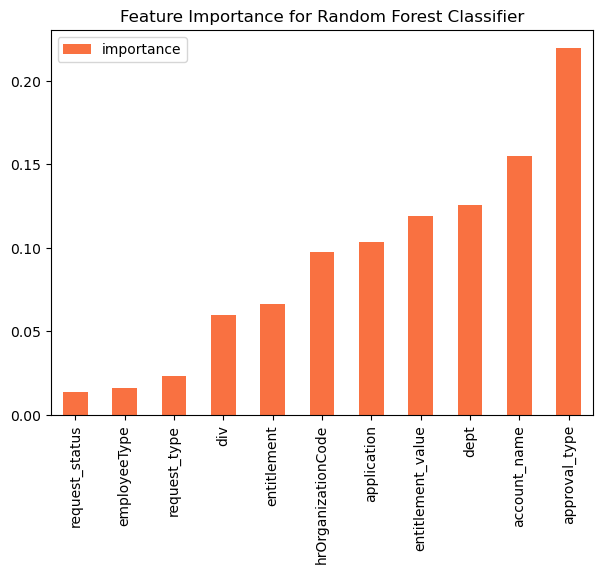

In [17]:
fg, ax = plt.subplots(figsize = (7,5))
feat_imp = pd.DataFrame(rf_ros.feature_importances_, index = X.columns, columns = ['importance'])
feat_imp.sort_values('importance').plot(kind = 'bar', title = 'Feature Importance for Random Forest Classifier',ax = ax, color='#f97141')
plt.show()